
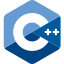
<br>

<div style="text-align:center; font-size:200%;">
 <b>Virtuelle Funktionen</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 07 Virtuelle Funktionen.ipynb -->
<!-- slides/module_170_oop/topic_120_virtual_functions.cpp -->


# Statischer vs. Dynamischer Typ

- *Statischer Typ* eines Objekts
  - Typ des Objekts zur Compile-Zeit
- *Dynamischer Typ* eines Objekts
  - Typ des Objekts zur Laufzeit

In [ ]:
#include <vector>

In [ ]:
int i{0};

In [ ]:
std::vector<int> v{};


- Zeiger und Referenzen können auf Subtyp-Instanzen verweisen
  - statischer Typ oft nicht dynamischer Typ
  - statischer Typ immer ein Supertyp des dynamischen Typs
- Das ist möglich bei
  - Zeigern und Referenzen (z.B. `BaseV1*`, `BaseV1&`)
  - Typen, die diese Semantik implementieren (z.B. `std::unique_ptr`)
- Das ist **nicht** möglich bei **Werten** (z.B. `int`, `std::vector`)

In [ ]:
#include <iostream>

In [ ]:
class BaseV1
{
public:
    int x;
    BaseV1(int x) : x{x} {}

    void print() const { std::cout << "BaseV1::print(): x = " << x << "\n"; }
};

In [ ]:
class DerivedV1 : public BaseV1
{
public:
    int y;
    DerivedV1(int x, int y) : BaseV1{x}, y{y} {}

    void print() const
    {
        std::cout << "DerivedV1::print(): x = " << x << ", y = " << y << "\n";
    }
};

In [ ]:
BaseV1 b{1};
DerivedV1 d{2, 3};

In [ ]:
BaseV1* pb = &b;    // Statischer Typ: `BaseV1*`, dynamischer Typ: `BaseV1*`
pb->print();

In [ ]:
pb = &d;            // Statischer Typ: `BaseV1*`, dynamischer Typ: `DerivedV1*`
pb->print();

In [ ]:
DerivedV1* pd = &d; // Statischer Typ: `DerivedV1*`, dynamischer Typ: `DerivedV1*`
pd->print();


- `print()` ist in beiden Klassen definiert
- Der statische Typ bestimmt, welche Funktion aufgerufen wird:

| Statischer Typ | Aufgerufene Funktion |
| -------------- | -------------------- |
| `BaseV1`       | `BaseV1::print()`    |
| `DerivedV1`    | `DerivedV1::print()` |

- Das ist normalerweise nicht das, was wir wollen!


## Virtuelle Funktionen

- Virtuelle Funktion:
  - Member-Funktion
  - In einer Basisklasse deklariert
  - Kann in einer abgeleiteten Klasse überschrieben werden
- Syntax:
  - `virtual` in der Basisklasse
  - `override` in der abgeleiteten Klasse (optional aber empfohlen)

In [ ]:
#include <iostream>

In [ ]:
class BaseV2 {
public:
    int x;
    BaseV2(int x) : x{x} {}

    virtual void print() const {
        std::cout << "BaseV2::print(): x = " << x << "\n";
    }
};

In [ ]:
class DerivedV2 : public BaseV2 {
public:
    int y;
    DerivedV2(int x, int y) : BaseV2{x}, y{y} {}

    void print() const override {
        std::cout << "DerivedV2::print(): x = " << x << ", y = " << y << "\n";
    }
};


## Aufruf virtueller Funktionen

- `print()` ist eine virtuelle Funktion
- Der **dynamische Typ** bestimmt, welche Funktion aufgerufen wird:

| Dynamischer Typ | Aufgerufene Funktion |
| --------------- | -------------------- |
| `BaseV2`        | `BaseV2::print()`    |
| `DerivedV2`     | `DerivedV2::print()` |

In [ ]:
BaseV2 b{1};       // Statischer Typ: `BaseV2`, dynamischer Typ: `BaseV2`
b.print();

In [ ]:
DerivedV2 d{2, 3}; // Statischer Typ: `DerivedV2`, dynamischer Typ: `DerivedV2`
d.print();

In [ ]:
BaseV2* pb = &b; // Statischer Typ: `BaseV2*`, dynamischer Typ: `BaseV2*`
pb->print();
pb = &d;         // Statischer Typ: `BaseV2*`, dynamischer Typ: `DerivedV2*`
pb->print();

In [ ]:
DerivedV2* pd = &d; // Statischer Typ: `DerivedV2*`, dynamischer Typ: `DerivedV2*`
pd->print();


## Methoden der Basisklasse aufrufen

- Wir können die Methoden der Basisklasse explizit aufrufen:

In [ ]:
#include <iostream>
#include <string_view>

In [ ]:
class SimpleGreeting {
public:
    virtual void print(std::string_view name) const {
        std::cout << "Hello, " << name << "!\n";
    }
};

In [ ]:
class ElaborateGreeting : public SimpleGreeting {
public:
    virtual void print(std::string_view name) const override {
        SimpleGreeting::print(name);
        std::cout << "How are you?\n";
    }
};

In [ ]:
std::unique_ptr<SimpleGreeting> g{std::make_unique<ElaborateGreeting>()};

In [ ]:
g->print("World");

In [ ]:
g = std::make_unique<SimpleGreeting>();

In [ ]:
g->print("World");




# Rein virtuelle Funktionen

- In vielen Fällen können virtuelle Funktionen in der Basisklasse nicht
  sinnvoll implementiert werden
- In diesen Fällen können wir die Funktion als **rein virtuell** deklarieren
- Syntax:
  - `= 0` nach dem Funktions-Kopf in der Basisklasse
- Die Funktion muss in einer abgeleiteten Klasse überschrieben werden


## Konsequenzen

- Eine Klasse mit mindestens einer rein virtuellen Funktion ist eine
  **abstrakte Klasse**
- Abstrakte Klassen können nicht instanziiert werden
- Abstrakte Klassen können als Basisklassen verwendet werden

In [ ]:
class BaseV3 {
public:
    virtual void print() const = 0;
};

In [ ]:
class DerivedV3a : public BaseV3 {
public:
    void print() const override {
        std::cout << "DerivedV3a::print()\n";
    }
};

In [ ]:
class DerivedV3b : public BaseV3 {
public:
    void print() const override {
        std::cout << "DerivedV3b::print()\n";
    }
};

In [ ]:
// BaseV3 b3; // Fehler: Kann nicht instanziiert werden

In [ ]:
DerivedV3a d3a;
DerivedV3b d3b;

In [ ]:
BaseV3* pb3{&d3a};

In [ ]:
pb3->print();

In [ ]:
pb3 = &d3b;

In [ ]:
pb3->print();


## Mini-Workshop: Mitarbeiter

In dieser Aufgabe werden wir eine kleine Klassenhierarchie für die
Repräsentation von Mitarbeitern einer Firma erstellen. Jeder Mitarbeiter hat
einen Namen und ein Gehalt. Es gibt zwei Arten von Mitarbeitern: Ingenieure
und Manager, deren Gehalt unterschiedlich berechnet wird. Gehen Sie dabei
folgendermaßen vor:


1. Erstellen Sie eine Basisklasse namens "Employee" mit den folgenden
   Membern:
   - Eine protected Member-Variable `name` vom Typ `std::string` zur
     Speicherung des Namens des Mitarbeiters.
   - Eine protected Member-Variablen `base_salary` vom Typ `double` zur
     Speicherung des Grundgehalts des Mitarbeiters.
   - Einen öffentlichen Konstruktor, der `name` und `base_salary` als
     Parameter entgegennimmt und die Member-Variablen initialisiert.
   - Eine Funktion `get_name()`, die einen `std::string` mit dem Namen des
     Mitarbeiters zurückgibt.
   - Eine rein virtuelle Funktion `get_salary()`, die einen `double`-Wert
     zurückgibt. Diese Funktion soll in abgeleiteten Klassen überschrieben
     werden.


2. Leiten Sie zwei Klassen von der Basisklasse `Employee` ab:
   - Erstellen Sie eine Klasse namens "Manager" mit den folgenden Membern:
     - Eine private Member-Variable `bonus` vom Typ `double` zur Speicherung
       des Bonus.
     - Einen öffentlichen Konstruktor, der `name`, `base_salary` und `bonus`
       als Parameter entgegennimmt und die Member-Variablen initialisiert.
     - Überschreiben Sie die Funktion `get_name()`, so dass sie den Namen des
       Mitarbeiters gefolgt von ", Manager" zurückgibt. Verwenden Sie dabei
       `get_name()` aus der Basisklasse.
     - Überschreiben Sie die Funktion `get_salary()`, um das Gesamtgehalt zu
       berechnen und zurückzugeben, das die Summe aus Grundgehalt und Bonus
       ist.

  - Erstellen Sie eine Klasse namens "Engineer" mit den folgenden Membern:
    - Eine private Member-Variable `years_of_experience` vom Typ `int` zur
      Speicherung der Berufserfahrung.
    - Einen öffentlichen Konstruktor, der `name`, `base_salary` und
      `years_of_experience` als Parameter entgegennimmt und die
      Member-Variablen initialisiert.
    - Überschreiben Sie die Funktion `get_salary()`, um das Gesamtgehalt zu
      berechnen und zurückzugeben. Das Gesamtgehalt besteht aus dem
      Grundgehalt plus zusätzlich 1000 Euro für jedes Jahr Berufserfahrung.


- Erstellen sie ein Objekt der Klasse `Manager` mit dem Namen "John Doe",
  einem Grundgehalt von 5000 Euro und einem Bonus von 1000 Euro.
- Erstellen sie ein Objekt der Klasse `Engineer` mit dem Namen "Jane Smith",
  einem Grundgehalt von 4000 Euro und 3 Jahren Berufserfahrung.
- Rufen Sie die Funktionen `get_name()` und `get_salary()` für jedes Objekt
  sowohl direkt, als auch über einen Zeiger auf `Employee` auf.